## Supervised Learning (Sec. 001)
#### Group 2</br>

- Mehreen Abdul Rahman</br>
- Bruno Cantanhede Morgado</br>
- Ankit Mehra</br>
- Ayesha Mohammed Azim Shaikh</br>
- Prashant Sharma</br>

In [270]:
# Initial imports
import numpy as np
import pandas as pd
import time
import math
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_val_predict, GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os

In [271]:
# Helper Function to plot confusion Matrix
def plot_confusion_matrix(confusion_matrix, y_limit: list, model:str, color_map: str):
    #Plot the confusion Matrix
    fig, ax = plt.subplots(figsize=(10,6))
    title = f'Confusion matrix: {model}'
    # create heatmap
    sns.heatmap(confusion_matrix, annot = True, cmap = color_map ,fmt='g')
    ax.xaxis.set_label_position("top")
    ax.set_ylim(y_limit)
    ax.xaxis.set_ticklabels(['0','1'])
    ax.yaxis.set_ticklabels(['0','1'])
    plt.title(title, fontsize=20, pad=10.0)
    plt.ylabel('Actual label', fontsize='large')
    plt.xlabel('Predicted label', fontsize='large')
    plt.tight_layout()

In [272]:
# Load the KSi Dataset
df_ksi = pd.read_csv('KSI.csv')

In [273]:
# Display all the columns
pd.set_option('display.max_columns', None)

In [274]:
# Inspect the initial five rows of the dataset
df_ksi.head()

,X,Y,INDEX_,ACCNUM,YEAR,DATE,TIME,HOUR,STREET1,STREET2,OFFSET,ROAD_CLASS,DISTRICT,WARDNUM,DIVISION,LATITUDE,LONGITUDE,LOCCOORD,ACCLOC,TRAFFCTL,VISIBILITY,LIGHT,RDSFCOND,ACCLASS,IMPACTYPE,INVTYPE,INVAGE,INJURY,FATAL_NO,INITDIR,VEHTYPE,MANOEUVER,DRIVACT,DRIVCOND,PEDTYPE,PEDACT,PEDCOND,CYCLISTYPE,CYCACT,CYCCOND,PEDESTRIAN,CYCLIST,AUTOMOBILE,MOTORCYCLE,TRUCK,TRSN_CITY_VEH,EMERG_VEH,PASSENGER,SPEEDING,AG_DRIV,REDLIGHT,ALCOHOL,DISABILITY,POLICE_DIVISION,HOOD_ID,NEIGHBOURHOOD,ObjectId
0,-8.844611e+06,5.412414e+06,3387730,892658,2006,2006/03/11 05:00:00+00,852,8,BLOOR ST W,DUNDAS ST W,<Null>,Major Arterial,Toronto and East York,4,11,43.656345,-79.452490,Intersection,At Intersection,Traffic Signal,Clear,Daylight,Dry,Fatal,Pedestrian Collisions,Driver,unknown,None,<Null>,South,"Automobile, Station Wagon",Turning Left,Failed to Yield Right of Way,Unknown,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,Yes,<Null>,Yes,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,Yes,<Null>,<Null>,<Null>,D11,88,High Park North (88),1
1,-8.844611e+06,5.412414e+06,3387731,892658,2006,2006/03/11 05:00:00+00,852,8,BLOOR ST W,DUNDAS ST W,<Null>,Major Arterial,Toronto and East York,4,11,43.656345,-79.452490,Intersection,At Intersection,Traffic Signal,Clear,Daylight,Dry,Fatal,Pedestrian Collisions,Pedestrian,65 to 69,Fatal,<Null>,North,Other,<Null>,<Null>,<Null>,Vehicle turns left while ped crosses with ROW ...,Crossing with right of way,Unknown,<Null>,<Null>,<Null>,Yes,<Null>,Yes,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,Yes,<Null>,<Null>,<Null>,D11,88,High Park North (88),2
2,-8.816480e+06,5.434843e+06,3388101,892810,2006,2006/03/11 05:00:00+00,915,9,MORNINGSIDE AVE,SHEPPARD AVE E,<Null>,Major Arterial,Scarborough,25,42,43.801943,-79.199786,Intersection,At Intersection,Traffic Signal,Clear,Daylight,Dry,Fatal,Turning Movement,Motorcycle Driver,45 to 49,Fatal,<Null>,East,Motorcycle,Turning Right,Disobeyed Traffic Control,Unknown,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,Yes,Yes,<Null>,<Null>,<Null>,<Null>,<Null>,Yes,Yes,<Null>,<Null>,D42,131,Rouge (131),3
3,-8.816480e+06,5.434843e+06,3388102,892810,2006,2006/03/11 05:00:00+00,915,9,MORNINGSIDE AVE,SHEPPARD AVE E,<Null>,Major Arterial,Scarborough,25,42,43.801943,-79.199786,Intersection,At Intersection,Traffic Signal,Clear,Daylight,Dry,Fatal,Turning Movement,Driver,unknown,None,<Null>,South,"Automobile, Station Wagon",Going Ahead,Driving Properly,Unknown,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,Yes,Yes,<Null>,<Null>,<Null>,<Null>,<Null>,Yes,Yes,<Null>,<Null>,D42,131,Rouge (131),4
4,-8.822759e+06,5.424516e+06,3387793,892682,2006,2006/03/12 05:00:00+00,240,2,EGLINTON AVE E,COMMONWEALTH AVE,<Null>,Major Arterial,Scarborough,"21,20",41,43.734945,-79.256190,Mid-Block,<Null>,No Control,Clear,Dark,Dry,Fatal,Pedestrian Collisions,Driver,25 to 29,None,<Null>,West,"Automobile, Station Wagon",Going Ahead,Other,"Ability Impaired, Alcohol",<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,Yes,<Null>,Yes,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,Yes,<Null>,D41,138,Eglinton East (138),5


In [275]:
# Inspect the last 5 rows
df_ksi.tail()

,X,Y,INDEX_,ACCNUM,YEAR,DATE,TIME,HOUR,STREET1,STREET2,OFFSET,ROAD_CLASS,DISTRICT,WARDNUM,DIVISION,LATITUDE,LONGITUDE,LOCCOORD,ACCLOC,TRAFFCTL,VISIBILITY,LIGHT,RDSFCOND,ACCLASS,IMPACTYPE,INVTYPE,INVAGE,INJURY,FATAL_NO,INITDIR,VEHTYPE,MANOEUVER,DRIVACT,DRIVCOND,PEDTYPE,PEDACT,PEDCOND,CYCLISTYPE,CYCACT,CYCCOND,PEDESTRIAN,CYCLIST,AUTOMOBILE,MOTORCYCLE,TRUCK,TRSN_CITY_VEH,EMERG_VEH,PASSENGER,SPEEDING,AG_DRIV,REDLIGHT,ALCOHOL,DISABILITY,POLICE_DIVISION,HOOD_ID,NEIGHBOURHOOD,ObjectId
16855,-8.820837e+06,5.421411e+06,81509784,1636966,2020,2020/08/30 04:00:00+00,1340,13,BRIMLEY RD,BARKDENE HILLS,50 m South of,<Null>,<Null>,<Null>,<Null>,43.714793,-79.238926,Mid-Block,Non Intersection,No Control,Clear,Daylight,Dry,Non-Fatal Injury,Cyclist Collisions,Cyclist,25 to 29,Major,<Null>,North,Bicycle,Going Ahead,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,Driving Properly,Normal,<Null>,Yes,Yes,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,Yes,<Null>,<Null>,<Null>,D41,123,Cliffcrest (123),16856
16856,-8.820068e+06,5.425334e+06,81505452,1650701,2020,2020/09/01 04:00:00+00,1205,12,EGLINTON AVE E,BELLAMY RD N,<Null>,Major Arterial,Scarborough,"21,20",43,43.740256,-79.232021,Intersection,At Intersection,Traffic Signal,Clear,Daylight,Dry,Non-Fatal Injury,Turning Movement,Driver,65 to 69,None,<Null>,East,"Automobile, Station Wagon",Turning Left,Failed to Yield Right of Way,Inattentive,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,Yes,<Null>,<Null>,<Null>,<Null>,Yes,<Null>,Yes,<Null>,<Null>,<Null>,D43,138,Eglinton East (138),16857
16857,-8.820068e+06,5.425334e+06,81505453,1650701,2020,2020/09/01 04:00:00+00,1205,12,EGLINTON AVE E,BELLAMY RD N,<Null>,Major Arterial,Scarborough,"21,20",43,43.740256,-79.232021,Intersection,At Intersection,Traffic Signal,Clear,Daylight,Dry,Non-Fatal Injury,Turning Movement,Driver,30 to 34,Minor,<Null>,West,"Automobile, Station Wagon",Going Ahead,Driving Properly,Normal,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,Yes,<Null>,<Null>,<Null>,<Null>,Yes,<Null>,Yes,<Null>,<Null>,<Null>,D43,138,Eglinton East (138),16858
16858,-8.820068e+06,5.425334e+06,81505454,1650701,2020,2020/09/01 04:00:00+00,1205,12,EGLINTON AVE E,BELLAMY RD N,<Null>,Major Arterial,Scarborough,"21,20",43,43.740256,-79.232021,Intersection,At Intersection,Traffic Signal,Clear,Daylight,Dry,Non-Fatal Injury,Turning Movement,Passenger,10 to 14,Major,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,Yes,<Null>,<Null>,<Null>,<Null>,Yes,<Null>,Yes,<Null>,<Null>,<Null>,D43,138,Eglinton East (138),16859
16859,-8.842562e+06,5.412998e+06,81509748,1650875,2020,2020/09/01 04:00:00+00,1238,12,BLOOR ST W,GLADSTONE AVE,9 m South of,<Null>,<Null>,<Null>,<Null>,43.660144,-79.434086,Mid-Block,Non Intersection,No Control,Clear,Daylight,Dry,Non-Fatal Injury,Cyclist Collisions,Driver,50 to 54,None,<Null>,East,"Automobile, Station Wagon",Slowing or Stopping,Improper Lane Change,Normal,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,Yes,Yes,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,D14,93,Dovercourt-Wallace Emerson-Junction (93),16860


In [276]:
# Get a summary of the dataset
df_ksi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 57 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   X                16860 non-null  float64
 1   Y                16860 non-null  float64
 2   INDEX_           16860 non-null  int64  
 3   ACCNUM           16860 non-null  int64  
 4   YEAR             16860 non-null  int64  
 5   DATE             16860 non-null  object 
 6   TIME             16860 non-null  int64  
 7   HOUR             16860 non-null  int64  
 8   STREET1          16860 non-null  object 
 9   STREET2          16860 non-null  object 
 10  OFFSET           16860 non-null  object 
 11  ROAD_CLASS       16860 non-null  object 
 12  DISTRICT         16860 non-null  object 
 13  WARDNUM          16860 non-null  object 
 14  DIVISION         16860 non-null  object 
 15  LATITUDE         16860 non-null  float64
 16  LONGITUDE        16860 non-null  float64
 17  LOCCOORD    

`The info() method suggests that the dataset is integral and that there are no missing values
We see below that i isn't exactly the case`

In [277]:
# Null values are informed as strings
df_ksi['OFFSET'][0]

'<Null>'

In [278]:
type(df_ksi['OFFSET'][0])

str

In [279]:
# Set all "<Null>" strings to NaN
df_ksi = df_ksi.replace('<Null>', np.nan, regex = True)

In [280]:
df_ksi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 57 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   X                16860 non-null  float64
 1   Y                16860 non-null  float64
 2   INDEX_           16860 non-null  int64  
 3   ACCNUM           16860 non-null  int64  
 4   YEAR             16860 non-null  int64  
 5   DATE             16860 non-null  object 
 6   TIME             16860 non-null  int64  
 7   HOUR             16860 non-null  int64  
 8   STREET1          16860 non-null  object 
 9   STREET2          15350 non-null  object 
 10  OFFSET           2746 non-null   object 
 11  ROAD_CLASS       16363 non-null  object 
 12  DISTRICT         16719 non-null  object 
 13  WARDNUM          16664 non-null  object 
 14  DIVISION         16664 non-null  object 
 15  LATITUDE         16860 non-null  float64
 16  LONGITUDE        16860 non-null  float64
 17  LOCCOORD    

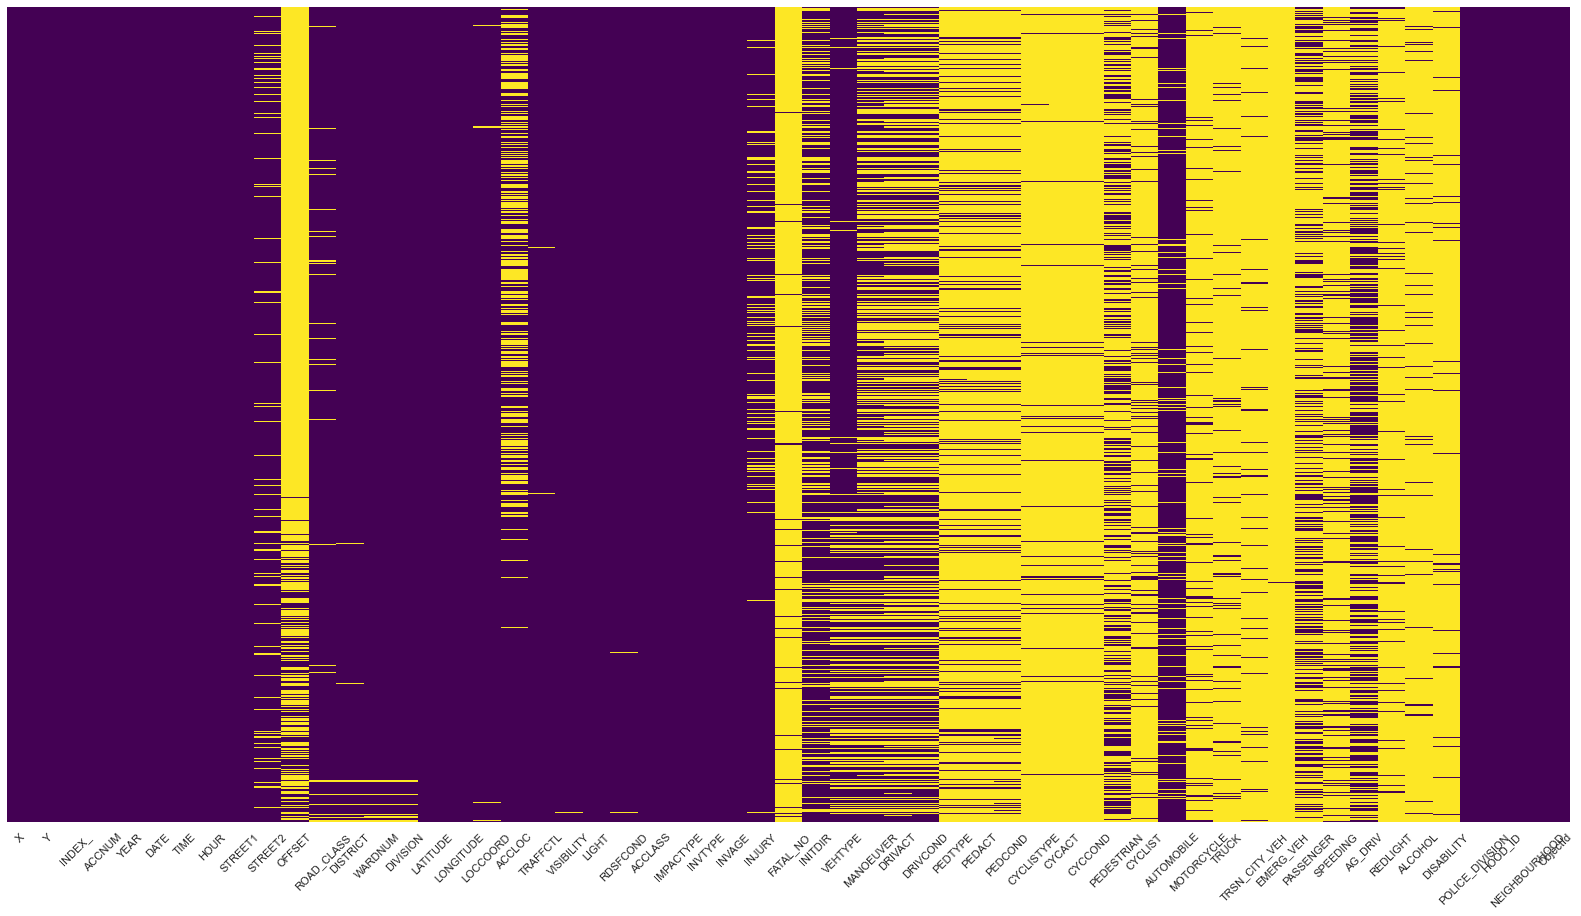

In [281]:
sns.set(rc={"figure.figsize":(28, 15)})
sns.heatmap(df_ksi.isna(),yticklabels=False,cbar=False,cmap='viridis')
plt.xticks(rotation = 45)
plt.show()

In [282]:
# Move target class to the last position in the dataframe
new_cols = ['X', 'Y', 'INDEX_', 'ACCNUM', 'YEAR', 'DATE', 'TIME', 'HOUR', 'STREET1',
       'STREET2', 'OFFSET', 'ROAD_CLASS', 'DISTRICT', 'WARDNUM', 'DIVISION',
       'LATITUDE', 'LONGITUDE', 'LOCCOORD', 'ACCLOC', 'TRAFFCTL', 'VISIBILITY',
       'LIGHT', 'RDSFCOND', 'IMPACTYPE', 'INVTYPE', 'INVAGE',
       'INJURY', 'FATAL_NO', 'INITDIR', 'VEHTYPE', 'MANOEUVER', 'DRIVACT',
       'DRIVCOND', 'PEDTYPE', 'PEDACT', 'PEDCOND', 'CYCLISTYPE', 'CYCACT',
       'CYCCOND', 'PEDESTRIAN', 'CYCLIST', 'AUTOMOBILE', 'MOTORCYCLE', 'TRUCK',
       'TRSN_CITY_VEH', 'EMERG_VEH', 'PASSENGER', 'SPEEDING', 'AG_DRIV',
       'REDLIGHT', 'ALCOHOL', 'DISABILITY', 'POLICE_DIVISION', 'HOOD_ID',
       'NEIGHBOURHOOD', 'ObjectId', 'ACCLASS']
df_ksi = df_ksi.reindex(columns = new_cols)

In [283]:
df_ksi.columns

Index(['X', 'Y', 'INDEX_', 'ACCNUM', 'YEAR', 'DATE', 'TIME', 'HOUR', 'STREET1',
       'STREET2', 'OFFSET', 'ROAD_CLASS', 'DISTRICT', 'WARDNUM', 'DIVISION',
       'LATITUDE', 'LONGITUDE', 'LOCCOORD', 'ACCLOC', 'TRAFFCTL', 'VISIBILITY',
       'LIGHT', 'RDSFCOND', 'IMPACTYPE', 'INVTYPE', 'INVAGE', 'INJURY',
       'FATAL_NO', 'INITDIR', 'VEHTYPE', 'MANOEUVER', 'DRIVACT', 'DRIVCOND',
       'PEDTYPE', 'PEDACT', 'PEDCOND', 'CYCLISTYPE', 'CYCACT', 'CYCCOND',
       'PEDESTRIAN', 'CYCLIST', 'AUTOMOBILE', 'MOTORCYCLE', 'TRUCK',
       'TRSN_CITY_VEH', 'EMERG_VEH', 'PASSENGER', 'SPEEDING', 'AG_DRIV',
       'REDLIGHT', 'ALCOHOL', 'DISABILITY', 'POLICE_DIVISION', 'HOOD_ID',
       'NEIGHBOURHOOD', 'ObjectId', 'ACCLASS'],
      dtype='object')

In [284]:
# Number of columns in the dataset
num_columns = len(df_ksi.columns)

In [285]:
# Number of columns that contain at least one missing value
num_missing_val_columns = len(df_ksi.isna().sum()[df_ksi.isna().sum()>0])

### Columns and their respective numbers of missing values

In [286]:
df_ksi.isna().sum()[df_ksi.isna().sum()>0]

STREET2           1510
OFFSET           14114
ROAD_CLASS         497
DISTRICT           141
WARDNUM            196
DIVISION           196
LOCCOORD           105
ACCLOC            5450
TRAFFCTL            29
VISIBILITY          18
RDSFCOND            23
IMPACTYPE            4
INVTYPE             12
INJURY            1612
FATAL_NO         16147
INITDIR           4894
VEHTYPE           2813
MANOEUVER         7233
DRIVACT           8398
DRIVCOND          8396
PEDTYPE          14074
PEDACT           14081
PEDCOND          14025
CYCLISTYPE       16160
CYCACT           16153
CYCCOND          16154
PEDESTRIAN       10033
CYCLIST          15081
AUTOMOBILE        1552
MOTORCYCLE       15476
TRUCK            15818
TRSN_CITY_VEH    15849
EMERG_VEH        16829
PASSENGER        10498
SPEEDING         14575
AG_DRIV           8157
REDLIGHT         15451
ALCOHOL          16121
DISABILITY       16392
dtype: int64

In [289]:
# Proportion of columns with ate least one missing value
print(f'{round((num_missing_val_columns / num_columns)*100,2)}% have at least one missing value')

68.42% have at least one missing value


In [290]:
df_ksi.drop(['X', 'Y', 'INDEX_'], axis = 1, inplace = True)

`Drop X and Y since they are a different scale for latitude and longitude
INDEX_ is also dropped for it's lack of statistical value.`

In [291]:
df_ksi.head()

,ACCNUM,YEAR,DATE,TIME,HOUR,STREET1,STREET2,OFFSET,ROAD_CLASS,DISTRICT,WARDNUM,DIVISION,LATITUDE,LONGITUDE,LOCCOORD,ACCLOC,TRAFFCTL,VISIBILITY,LIGHT,RDSFCOND,IMPACTYPE,INVTYPE,INVAGE,INJURY,FATAL_NO,INITDIR,VEHTYPE,MANOEUVER,DRIVACT,DRIVCOND,PEDTYPE,PEDACT,PEDCOND,CYCLISTYPE,CYCACT,CYCCOND,PEDESTRIAN,CYCLIST,AUTOMOBILE,MOTORCYCLE,TRUCK,TRSN_CITY_VEH,EMERG_VEH,PASSENGER,SPEEDING,AG_DRIV,REDLIGHT,ALCOHOL,DISABILITY,POLICE_DIVISION,HOOD_ID,NEIGHBOURHOOD,ObjectId,ACCLASS
0,892658,2006,2006/03/11 05:00:00+00,852,8,BLOOR ST W,DUNDAS ST W,NaN,Major Arterial,Toronto and East York,4,11,43.656345,-79.452490,Intersection,At Intersection,Traffic Signal,Clear,Daylight,Dry,Pedestrian Collisions,Driver,unknown,None,NaN,South,"Automobile, Station Wagon",Turning Left,Failed to Yield Right of Way,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,D11,88,High Park North (88),1,Fatal
1,892658,2006,2006/03/11 05:00:00+00,852,8,BLOOR ST W,DUNDAS ST W,NaN,Major Arterial,Toronto and East York,4,11,43.656345,-79.452490,Intersection,At Intersection,Traffic Signal,Clear,Daylight,Dry,Pedestrian Collisions,Pedestrian,65 to 69,Fatal,NaN,North,Other,NaN,NaN,NaN,Vehicle turns left while ped crosses with ROW ...,Crossing with right of way,Unknown,NaN,NaN,NaN,Yes,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,D11,88,High Park North (88),2,Fatal
2,892810,2006,2006/03/11 05:00:00+00,915,9,MORNINGSIDE AVE,SHEPPARD AVE E,NaN,Major Arterial,Scarborough,25,42,43.801943,-79.199786,Intersection,At Intersection,Traffic Signal,Clear,Daylight,Dry,Turning Movement,Motorcycle Driver,45 to 49,Fatal,NaN,East,Motorcycle,Turning Right,Disobeyed Traffic Control,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Yes,NaN,NaN,NaN,NaN,NaN,Yes,Yes,NaN,NaN,D42,131,Rouge (131),3,Fatal
3,892810,2006,2006/03/11 05:00:00+00,915,9,MORNINGSIDE AVE,SHEPPARD AVE E,NaN,Major Arterial,Scarborough,25,42,43.801943,-79.199786,Intersection,At Intersection,Traffic Signal,Clear,Daylight,Dry,Turning Movement,Driver,unknown,None,NaN,South,"Automobile, Station Wagon",Going Ahead,Driving Properly,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Yes,NaN,NaN,NaN,NaN,NaN,Yes,Yes,NaN,NaN,D42,131,Rouge (131),4,Fatal
4,892682,2006,2006/03/12 05:00:00+00,240,2,EGLINTON AVE E,COMMONWEALTH AVE,NaN,Major Arterial,Scarborough,"21,20",41,43.734945,-79.256190,Mid-Block,NaN,No Control,Clear,Dark,Dry,Pedestrian Collisions,Driver,25 to 29,None,NaN,West,"Automobile, Station Wagon",Going Ahead,Other,"Ability Impaired, Alcohol",NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,D41,138,Eglinton East (138),5,Fatal


`The DATE column is split into DAY, MONTH, AND YEAR. The latter is dropped`

In [292]:
df_ksi['DATE'] = pd.to_datetime(df_ksi['DATE'], format = '%Y/%m/%d %H:%M:%S')

In [293]:
df_ksi.insert(1, 'MONTH', df_ksi['DATE'].dt.month)

In [294]:
df_ksi.insert(2, 'DAY', df_ksi['DATE'].dt.day)

In [295]:
df_ksi.drop(['YEAR', 'DATE', 'HOUR'], axis = 1, inplace = True)

In [297]:
df_ksi.OFFSET.value_counts()

10 m North of     45
5 m South of      42
10 m South of     37
10 m West of      36
20 m North of     34
                  ..
220 m South of     1
350 m North of     1
338 m West of      1
20 m North         1
458 m West of      1
Name: OFFSET, Length: 419, dtype: int64

In [298]:
df_ksi.OFFSET.isna().sum() /len(df_ksi.OFFSET)

0.837129300118624

In [299]:
# Drop ACCNUM and OFFSET to reduce model complexity. 
df_ksi.drop(['ACCNUM','OFFSET'], axis = 1, inplace = True)

In [300]:
# Switch all NaN values in Road_Class
df_ksi.ROAD_CLASS.replace(to_replace = np.nan, value = 'Road Type Unavailable', inplace = True)

In [301]:
df_ksi.ROAD_CLASS.value_counts()

Major Arterial           11976
Minor Arterial            2598
Collector                  929
Local                      761
Road Type Unavailable      497
Expressway                  52
Other                       25
Laneway                     10
Pending                      7
Expressway Ramp              4
Major Arterial Ramp          1
Name: ROAD_CLASS, dtype: int64

In [302]:
df_ksi.DISTRICT.value_counts()

Toronto and East York    5617
Etobicoke York           3884
Scarborough              3798
North York               3343
Toronto East York          77
Name: DISTRICT, dtype: int64

In [303]:
# Merge 'Toronto East York' with 'Toronto and East York' 
df_ksi.DISTRICT.replace(to_replace = 'Toronto East York', value = 'Toronto and East York', inplace = True)

In [304]:
# Replace NaN
df_ksi.DISTRICT.replace(to_replace = np.nan, value = 'District_Not_Informed', inplace = True)

In [305]:
# Drop 'WARDNUM' and 'DIVISION,' since their intrinsic values overlap with
# other columns that better inidcate location of the accident
df_ksi.drop(['WARDNUM', 'DIVISION'], axis = 1, inplace = True)

In [306]:
df_ksi.POLICE_DIVISION.unique()

array(['D11', 'D42', 'D41', 'D14', 'D23', 'D51', 'D32', 'D31', 'D43',
       'D12', 'D55', 'D13', 'D52', 'D54', 'D33', 'D22', 'D53'],
      dtype=object)

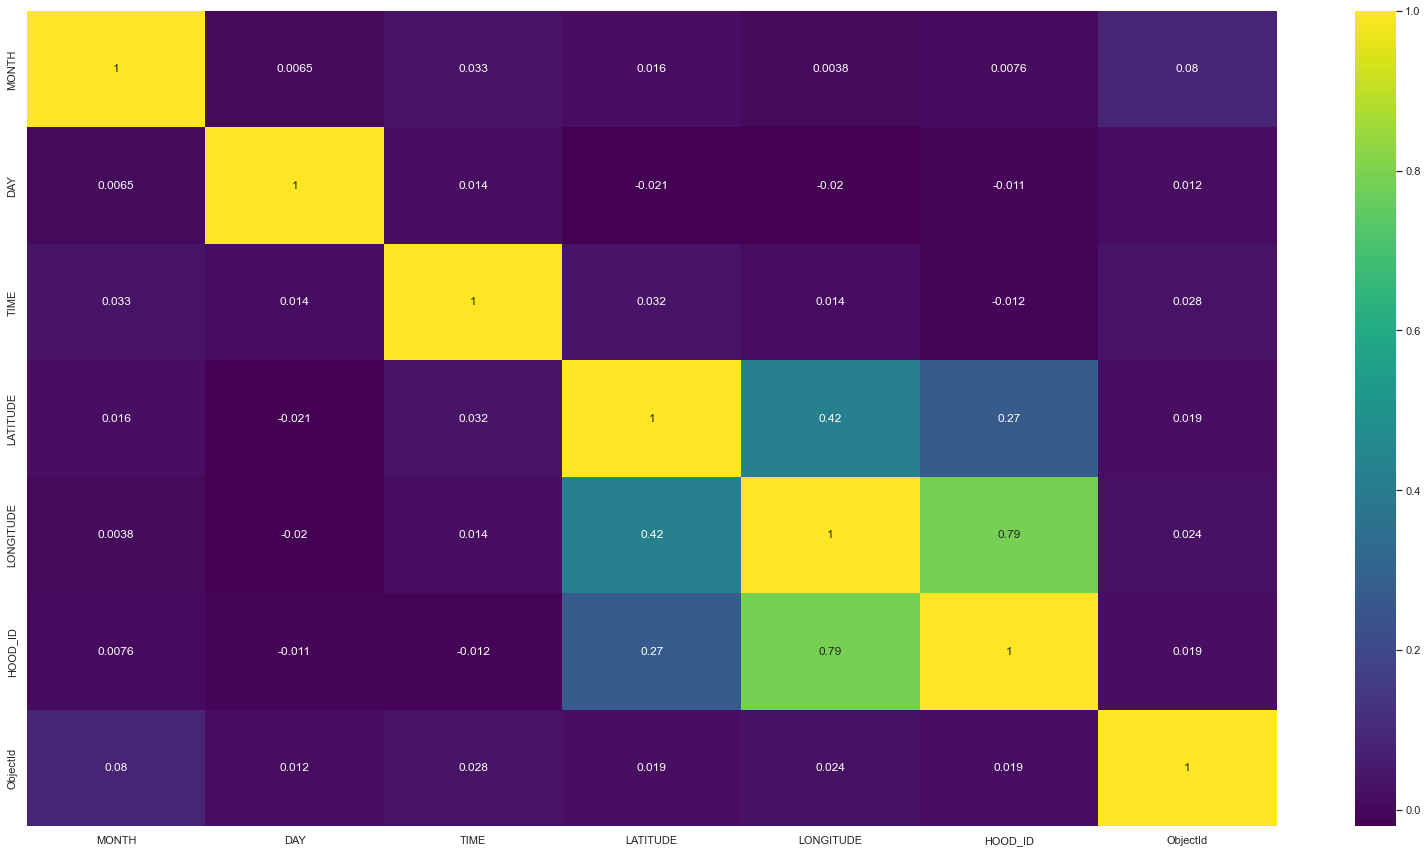

In [307]:
# Pearson's Correlation
sns.heatmap(df_ksi.corr(method = 'pearson'), annot = True, cmap = 'viridis')
plt.show()

In [37]:
df_ksi.columns

Index(['MONTH', 'DAY', 'TIME', 'STREET1', 'STREET2', 'ROAD_CLASS', 'DISTRICT',
       'LATITUDE', 'LONGITUDE', 'LOCCOORD', 'ACCLOC', 'TRAFFCTL', 'VISIBILITY',
       'LIGHT', 'RDSFCOND', 'IMPACTYPE', 'INVTYPE', 'INVAGE', 'INJURY',
       'FATAL_NO', 'INITDIR', 'VEHTYPE', 'MANOEUVER', 'DRIVACT', 'DRIVCOND',
       'PEDTYPE', 'PEDACT', 'PEDCOND', 'CYCLISTYPE', 'CYCACT', 'CYCCOND',
       'PEDESTRIAN', 'CYCLIST', 'AUTOMOBILE', 'MOTORCYCLE', 'TRUCK',
       'TRSN_CITY_VEH', 'EMERG_VEH', 'PASSENGER', 'SPEEDING', 'AG_DRIV',
       'REDLIGHT', 'ALCOHOL', 'DISABILITY', 'POLICE_DIVISION', 'HOOD_ID',
       'NEIGHBOURHOOD', 'ObjectId', 'ACCLASS'],
      dtype='object')

In [308]:
# Analyze the similarites between these two columns
df_ksi[['ACCLOC', 'LOCCOORD']]

,ACCLOC,LOCCOORD
0,At Intersection,Intersection
1,At Intersection,Intersection
2,At Intersection,Intersection
3,At Intersection,Intersection
4,NaN,Mid-Block
...,...,...
16855,Non Intersection,Mid-Block
16856,At Intersection,Intersection
16857,At Intersection,Intersection
16858,At Intersection,Intersection


In [309]:
# ACCLOC has a much larger number of NaN than LOCCOORD
df_ksi[['ACCLOC', 'LOCCOORD']].isna().sum()

ACCLOC      5450
LOCCOORD     105
dtype: int64

`Whenever LOCCORD has an NaN value and ACCLOC does note, we'll fill
the first column with the values from the latter`

In [310]:
#Fill NaN values in LOCCOORD with correspondent values in ACCLOC
df_ksi['LOCCOORD'].fillna(df_ksi.ACCLOC[df_ksi['LOCCOORD'].isna()], inplace=True)

In [311]:
# 16 LOCCORD's NaN values filled with values from ACCLOC
df_ksi.LOCCOORD.isna().sum()

89

In [312]:
df_ksi.LOCCOORD.value_counts()

Intersection                           11141
Mid-Block                               5598
At/Near Private Drive                     14
Exit Ramp Westbound                        5
Mid-Block (Abnormal)                       4
Exit Ramp Southbound                       3
Entrance Ramp Westbound                    2
Park, Private Property, Public Lane        2
Overpass or Bridge                         2
Name: LOCCOORD, dtype: int64

In [313]:
# Replace NaN values
df_ksi.LOCCOORD.replace(to_replace = np.nan, value = 'Loccoord_Not_Informed', inplace = True)

In [314]:
df_ksi.drop('ACCLOC', axis = 1, inplace = True)

In [315]:
df_ksi.TRAFFCTL.isna().sum()

29

In [316]:
# Traffic control seems to be relevant for our predictive model
df_ksi.TRAFFCTL.value_counts()

No Control              8092
Traffic Signal          7104
Stop Sign               1295
Pedestrian Crossover     195
Traffic Controller       104
Yield Sign                16
Streetcar (Stop for)      16
Traffic Gate               5
School Guard               2
Police Control             2
Name: TRAFFCTL, dtype: int64

In [317]:
# Replace NaN values
df_ksi.TRAFFCTL.replace(to_replace = np.nan, value = 'Traffctl_Not_Informed', inplace = True)

In [318]:
df_ksi.VISIBILITY.isna().sum()

18

In [319]:
# Merge 'Other and NaN into a new category'
df_ksi.VISIBILITY.replace(to_replace = ['Other', np.nan], value = 'Other_Visibility', inplace = True)

In [321]:
df_ksi.VISIBILITY.value_counts()

Clear                     14476
Rain                       1819
Snow                        332
Other_Visibility            117
Fog, Mist, Smoke, Dust       46
Freezing Rain                43
Drifting Snow                19
Strong wind                   8
Name: VISIBILITY, dtype: int64

In [322]:
df_ksi.RDSFCOND.value_counts()

Dry                      13435
Wet                       2870
Other_Road_Conditions      170
Loose Snow                 166
Slush                       96
Ice                         73
Packed Snow                 42
Loose Sand or Gravel         7
Spilled liquid               1
Name: RDSFCOND, dtype: int64

In [323]:
df_ksi.RDSFCOND.isna().sum()

0

In [324]:
# Merge 'Other' and NaN into 'Other_Road_Conditions'
df_ksi.RDSFCOND.replace(to_replace = ['Other', np.nan], value = 'Other_Road_Conditions', inplace = True)

In [325]:
df_ksi.RDSFCOND.value_counts()

Dry                      13435
Wet                       2870
Other_Road_Conditions      170
Loose Snow                 166
Slush                       96
Ice                         73
Packed Snow                 42
Loose Sand or Gravel         7
Spilled liquid               1
Name: RDSFCOND, dtype: int64

In [326]:
# Merge 'Other' and NaN into 'Other_Impact_Type'
df_ksi.IMPACTYPE.replace(to_replace = ['Other', np.nan], value = 'Other_Impact_Type', inplace = True)

In [327]:
df_ksi.IMPACTYPE.value_counts()

Pedestrian Collisions     6811
Turning Movement          2552
Cyclist Collisions        1674
Rear End                  1602
SMV Other                 1312
Angle                     1206
Approaching                870
Sideswipe                  466
Other_Impact_Type          186
SMV Unattended Vehicle     181
Name: IMPACTYPE, dtype: int64

In [328]:
df_ksi.INVTYPE.value_counts()

Driver                  7618
Pedestrian              2871
Passenger               2543
Vehicle Owner           1636
Cyclist                  726
Motorcycle Driver        607
Truck Driver             316
Other Property Owner     257
Other                    174
Motorcycle Passenger      32
Moped Driver              27
Driver - Not Hit          17
Wheelchair                13
In-Line Skater             5
Trailer Owner              2
Cyclist Passenger          2
Pedestrian - Not Hit       1
Witness                    1
Name: INVTYPE, dtype: int64

In [329]:
# Drop Involvement type, since it seems to overlap with other features' information 
df_ksi.drop('INVTYPE', axis = 1, inplace = True)

In [330]:
df_ksi.INJURY.value_counts()

None       6406
Major      5668
Minor      1311
Minimal    1042
Fatal       821
Name: INJURY, dtype: int64

In [331]:
df_ksi.INJURY.isna().sum()

1612

In [332]:
# Inkury also seems to be relevant
df_ksi.INJURY.replace(to_replace = np.nan, value = 'Injury_Not_Disclosed', inplace = True)

In [333]:
df_ksi.FATAL_NO.isna().sum()

16147

In [334]:
# Fatal number is merely an identifier
df_ksi.drop('FATAL_NO', axis = 1, inplace = True)

In [335]:
df_ksi.INITDIR.value_counts()

East       3010
West       2900
North      2813
South      2809
Unknown     434
Name: INITDIR, dtype: int64

In [336]:
df_ksi.INITDIR.isna().sum()

4894

In [337]:
# Drop 'INITDIR' to reduce dimension and model complexity
df_ksi.drop('INITDIR', axis = 1, inplace = True)

In [338]:
df_ksi.VEHTYPE.value_counts()

Automobile, Station Wagon           6890
Other                               4746
Bicycle                              722
Motorcycle                           608
Municipal Transit Bus (TTC)          249
Pick Up Truck                        179
Truck - Open                         175
Passenger Van                        118
Delivery Van                          72
Truck - Closed (Blazer, etc)          60
Street Car                            42
Truck - Dump                          34
Truck-Tractor                         33
Taxi                                  28
Moped                                 22
Truck (other)                         13
Bus (Other) (Go Bus, Gray Coach)      13
Truck - Tank                          10
Intercity Bus                         10
School Bus                             5
Police Vehicle                         4
Construction Equipment                 4
Tow Truck                              4
Fire Vehicle                           3
Other Emergency 

In [339]:
# Drop 'VEHTYPE' to reduce dimensions and model complexity
# The most relevant information contained here is replicated in other columns
df_ksi.drop('VEHTYPE', axis = 1, inplace = True)

In [340]:
df_ksi.MANOEUVER.isna().sum()

7233

In [341]:
df_ksi.MANOEUVER.value_counts()

Going Ahead                            5694
Turning Left                           1630
Stopped                                 576
Turning Right                           432
Slowing or Stopping                     249
Changing Lanes                          203
Other                                   176
Parked                                  175
Unknown                                 120
Reversing                               113
Making U Turn                            99
Overtaking                               87
Pulling Away from Shoulder or Curb       38
Merging                                  17
Pulling Onto Shoulder or towardCurb      14
Disabled                                  4
Name: MANOEUVER, dtype: int64

In [342]:
# Drop 'MANOUVER' to reduce dimensions and model complexity
df_ksi.drop('MANOEUVER', axis = 1, inplace = True)

In [343]:
# Driver Action seems relevant
df_ksi.DRIVACT.replace(to_replace = ['Other', np.nan], value = 'Other_Driver_Action', inplace = True)

In [344]:
# Driver Condition also seems relevant
df_ksi.DRIVCOND.value_counts()

Normal                                5407
Inattentive                           1412
Unknown                                988
Medical or Physical Disability         166
Had Been Drinking                      152
Ability Impaired, Alcohol Over .08     120
Ability Impaired, Alcohol              111
Fatigue                                 48
Other                                   43
Ability Impaired, Drugs                 17
Name: DRIVCOND, dtype: int64

In [345]:
df_ksi.DRIVCOND.isna().sum()

8396

In [346]:
df_ksi.DRIVCOND.replace(to_replace = ['Unknown', 'Other', np.nan], value = 'Driver_Condition_Unkown', inplace = True)

In [347]:
df_ksi.PEDTYPE.isna().sum()

14074

In [348]:
# Drop 'PEDTYPE' to reduce dimensions and model complexity
df_ksi.drop('PEDTYPE', axis = 1, inplace = True)

In [82]:
df_ksi.PEDACT.isna().sum()

14081

In [83]:
df_ksi.PEDACT.value_counts()

Crossing with right of way               873
Crossing, no Traffic Control             647
Crossing without right of way            383
On Sidewalk or Shoulder                  233
Running onto Roadway                     207
Other                                    205
Crossing, Pedestrian Crossover            58
Person Getting on/off Vehicle             36
Coming From Behind Parked Vehicle         33
Walking on Roadway with Traffic           31
Playing or Working on Highway             24
Walking on Roadway Against Traffic        20
Crossing marked crosswalk without ROW     15
Pushing/Working on Vehicle                12
Person Getting on/off School Bus           2
Name: PEDACT, dtype: int64

In [349]:
# Drop 'PEDACT' to reduce dimensions and model complexity
df_ksi.drop('PEDACT', axis = 1, inplace = True)

In [85]:
df_ksi.PEDCOND.value_counts()

Normal                                1597
Inattentive                            496
Unknown                                355
Had Been Drinking                      205
Medical or Physical Disability          66
Other                                   56
Ability Impaired, Alcohol               38
Ability Impaired, Alcohol Over .80      12
Ability Impaired, Drugs                  8
Fatigue                                  2
Name: PEDCOND, dtype: int64

In [86]:
df_ksi.PEDCOND.isna().sum()

14025

In [350]:
# Drop 'PEDCOND' to reduce dimensions and model complexity
df_ksi.drop('PEDCOND', axis = 1, inplace = True)

In [88]:
df_ksi.CYCLISTYPE.value_counts()

Motorist turned left across cyclists path.                                                       119
Cyclist without ROW rides into path of motorist at inter, lnwy, dwy-Cyclist not turn.            106
Cyclist and Driver travelling in same direction. One vehicle sideswipes the other.                96
Cyclist and Driver travelling in same direction. One vehicle rear-ended the other.                51
Cyclist struck opened vehicle door                                                                50
Motorist without ROW drives into path of cyclist at inter, lnwy, dwy-Driver not turn.             50
Motorist turns right at non-signal Inter.(stop, yield, no cont.,and dwy) and strikes cyclist.     41
Cyclist turned left across motorists path.                                                        38
Motorist turning right on green or amber at signalized intersection strikes cyclist.              33
Motorist turning right on red at signalized intersection strikes cyclist.                  

In [89]:
df_ksi.CYCLISTYPE.isna().sum()

16160

In [351]:
# Drop 'CYCLISTYPE' to reduce dimensions and model complexity
df_ksi.drop('CYCLISTYPE', axis = 1, inplace = True)

In [91]:
df_ksi.CYCACT.value_counts()

Driving Properly                385
Disobeyed Traffic Control        79
Other                            69
Failed to Yield Right of Way     59
Lost control                     35
Improper Turn                    24
Improper Lane Change             21
Improper Passing                 19
Speed too Fast For Condition      8
Following too Close               4
Wrong Way on One Way Road         4
Name: CYCACT, dtype: int64

In [352]:
df_ksi.CYCACT.isna().sum()

16153

In [353]:
# Drop 'CYCACT' to reduce dimensions and model complexity
df_ksi.drop('CYCACT', axis = 1, inplace = True)

In [95]:
df_ksi.CYCCOND.isna().sum()

16154

In [354]:
df_ksi.CYCCOND.value_counts()

Normal                                488
Inattentive                           100
Unknown                                70
Had Been Drinking                      27
Other                                   9
Ability Impaired, Alcohol               4
Medical or Physical Disability          3
Ability Impaired, Drugs                 2
Fatigue                                 2
Ability Impaired, Alcohol Over .80      1
Name: CYCCOND, dtype: int64

In [355]:
# Drop 'CYCCOND' due to the number of NaN values and to reduce model complexity
df_ksi.drop('CYCCOND', axis = 1, inplace = True)

### Keep the categories of those involved in the accident

In [97]:
df_ksi.PEDESTRIAN.isna().sum()

10033

In [98]:
df_ksi.PEDESTRIAN.value_counts()

Yes    6827
Name: PEDESTRIAN, dtype: int64

In [99]:
df_ksi.PEDESTRIAN = df_ksi.PEDESTRIAN.map({'Yes': 1,
                                          np.nan: 0})

In [100]:
df_ksi.CYCLIST.isna().sum()

15081

In [101]:
df_ksi.CYCLIST = df_ksi.CYCLIST.map({'Yes': 1,
                                          np.nan: 0})

In [102]:
df_ksi.AUTOMOBILE.isna().sum()

1552

In [103]:
df_ksi.AUTOMOBILE.value_counts()

Yes    15308
Name: AUTOMOBILE, dtype: int64

In [104]:
df_ksi.AUTOMOBILE = df_ksi.AUTOMOBILE.map({'Yes': 1,
                                          np.nan: 0})

In [105]:
df_ksi.MOTORCYCLE.value_counts()

Yes    1384
Name: MOTORCYCLE, dtype: int64

In [106]:
df_ksi.MOTORCYCLE = df_ksi.MOTORCYCLE.map({'Yes': 1,
                                          np.nan: 0})

In [107]:
df_ksi.TRUCK.isna().sum()

15818

In [108]:
df_ksi.TRUCK.value_counts()

Yes    1042
Name: TRUCK, dtype: int64

In [109]:
df_ksi.TRUCK = df_ksi.TRUCK.map({'Yes': 1,
                                np.nan: 0})

In [111]:
df_ksi.TRSN_CITY_VEH.isna().sum()

15849

In [112]:
df_ksi.TRSN_CITY_VEH.value_counts()

Yes    1011
Name: TRSN_CITY_VEH, dtype: int64

In [113]:
df_ksi.TRSN_CITY_VEH = df_ksi.TRSN_CITY_VEH.map({'Yes': 1,
                                                np.nan: 0})

In [114]:
df_ksi.EMERG_VEH.isna().sum()

16829

In [115]:
df_ksi.EMERG_VEH.value_counts()

Yes    31
Name: EMERG_VEH, dtype: int64

In [116]:
df_ksi.EMERG_VEH = df_ksi.EMERG_VEH.map({'Yes': 1,
                                        np.nan: 0})

In [117]:
df_ksi.PASSENGER.value_counts()

Yes    6362
Name: PASSENGER, dtype: int64

In [118]:
df_ksi.PASSENGER.isna().sum()

10498

In [119]:
df_ksi.PASSENGER = df_ksi.PASSENGER.map({'Yes': 1,
                                        np.nan: 0})

In [120]:
df_ksi.PASSENGER.value_counts()

0    10498
1     6362
Name: PASSENGER, dtype: int64

### Speeding, Agressive, red light, and alcohol driving seem empirically important for our model

In [121]:
df_ksi.SPEEDING.value_counts()

Yes    2285
Name: SPEEDING, dtype: int64

In [122]:
df_ksi.SPEEDING = df_ksi.SPEEDING.map({'Yes': 1,
                                        np.nan: 0})

In [123]:
df_ksi.AG_DRIV.value_counts()

Yes    8703
Name: AG_DRIV, dtype: int64

In [124]:
df_ksi.AG_DRIV = df_ksi.AG_DRIV.map({'Yes': 1,
                                    np.nan: 0})

In [125]:
df_ksi.AG_DRIV.value_counts()

1    8703
0    8157
Name: AG_DRIV, dtype: int64

In [126]:
df_ksi.REDLIGHT.value_counts()

Yes    1409
Name: REDLIGHT, dtype: int64

In [127]:
df_ksi.REDLIGHT = df_ksi.REDLIGHT.map({'Yes': 1,
                                        np.nan: 0})

In [128]:
df_ksi.ALCOHOL.value_counts()

Yes    739
Name: ALCOHOL, dtype: int64

In [129]:
df_ksi.ALCOHOL = df_ksi.ALCOHOL.map({'Yes': 1,
                                    np.nan: 0})

In [130]:
df_ksi.DISABILITY.value_counts()

Yes    468
Name: DISABILITY, dtype: int64

In [131]:
df_ksi.DISABILITY = df_ksi.DISABILITY.map({'Yes': 1,
                                           np.nan: 0})

In [132]:
df_ksi.POLICE_DIVISION.value_counts()

D42    1664
D41    1297
D22    1202
D32    1193
D23    1164
D14    1163
D43    1024
D52     947
D51     883
D31     878
D53     877
D33     851
D55     816
D11     809
D13     794
D12     737
D54     561
Name: POLICE_DIVISION, dtype: int64

In [133]:
df_ksi.HOOD_ID.value_counts()

77     646
1      515
76     394
131    378
137    369
      ... 
67      25
105     24
140     21
29      20
114     13
Name: HOOD_ID, Length: 140, dtype: int64

In [134]:
df_ksi.NEIGHBOURHOOD.value_counts()

Waterfront Communities-The Island (77)    646
West Humber-Clairville (1)                515
Bay Street Corridor (76)                  394
Rouge (131)                               378
Woburn (137)                              369
                                         ... 
Playter Estates-Danforth (67)              25
Lawrence Park North (105)                  24
Guildwood (140)                            21
Maple Leaf (29)                            20
Lambton Baby Point (114)                   13
Name: NEIGHBOURHOOD, Length: 140, dtype: int64

In [356]:
# Drop these location columns and IDs to simplify the model
df_ksi.drop(['HOOD_ID','ObjectId', 'POLICE_DIVISION', 'NEIGHBOURHOOD'], axis = 1, inplace = True)

In [357]:
# All columns are now integral
df_ksi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 33 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MONTH          16860 non-null  int64  
 1   DAY            16860 non-null  int64  
 2   TIME           16860 non-null  int64  
 3   STREET1        16860 non-null  object 
 4   STREET2        15350 non-null  object 
 5   ROAD_CLASS     16860 non-null  object 
 6   DISTRICT       16860 non-null  object 
 7   LATITUDE       16860 non-null  float64
 8   LONGITUDE      16860 non-null  float64
 9   LOCCOORD       16860 non-null  object 
 10  TRAFFCTL       16860 non-null  object 
 11  VISIBILITY     16860 non-null  object 
 12  LIGHT          16860 non-null  object 
 13  RDSFCOND       16860 non-null  object 
 14  IMPACTYPE      16860 non-null  object 
 15  INVAGE         16860 non-null  object 
 16  INJURY         16860 non-null  object 
 17  DRIVACT        16860 non-null  object 
 18  DRIVCO

In [358]:
# Create a copy of the dataset to prepare for transformation
df_pipeline = df_ksi.copy()

In [359]:
df_pipeline.head()

,MONTH,DAY,TIME,STREET1,STREET2,ROAD_CLASS,DISTRICT,LATITUDE,LONGITUDE,LOCCOORD,TRAFFCTL,VISIBILITY,LIGHT,RDSFCOND,IMPACTYPE,INVAGE,INJURY,DRIVACT,DRIVCOND,PEDESTRIAN,CYCLIST,AUTOMOBILE,MOTORCYCLE,TRUCK,TRSN_CITY_VEH,EMERG_VEH,PASSENGER,SPEEDING,AG_DRIV,REDLIGHT,ALCOHOL,DISABILITY,ACCLASS
0,3,11,852,BLOOR ST W,DUNDAS ST W,Major Arterial,Toronto and East York,43.656345,-79.452490,Intersection,Traffic Signal,Clear,Daylight,Dry,Pedestrian Collisions,unknown,None,Failed to Yield Right of Way,Driver_Condition_Unkown,Yes,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,Fatal
1,3,11,852,BLOOR ST W,DUNDAS ST W,Major Arterial,Toronto and East York,43.656345,-79.452490,Intersection,Traffic Signal,Clear,Daylight,Dry,Pedestrian Collisions,65 to 69,Fatal,Other_Driver_Action,Driver_Condition_Unkown,Yes,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,Fatal
2,3,11,915,MORNINGSIDE AVE,SHEPPARD AVE E,Major Arterial,Scarborough,43.801943,-79.199786,Intersection,Traffic Signal,Clear,Daylight,Dry,Turning Movement,45 to 49,Fatal,Disobeyed Traffic Control,Driver_Condition_Unkown,NaN,NaN,Yes,Yes,NaN,NaN,NaN,NaN,NaN,Yes,Yes,NaN,NaN,Fatal
3,3,11,915,MORNINGSIDE AVE,SHEPPARD AVE E,Major Arterial,Scarborough,43.801943,-79.199786,Intersection,Traffic Signal,Clear,Daylight,Dry,Turning Movement,unknown,None,Driving Properly,Driver_Condition_Unkown,NaN,NaN,Yes,Yes,NaN,NaN,NaN,NaN,NaN,Yes,Yes,NaN,NaN,Fatal
4,3,12,240,EGLINTON AVE E,COMMONWEALTH AVE,Major Arterial,Scarborough,43.734945,-79.256190,Mid-Block,No Control,Clear,Dark,Dry,Pedestrian Collisions,25 to 29,None,Other_Driver_Action,"Ability Impaired, Alcohol",Yes,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,Fatal


In [360]:
# Categorical Features
df_categorical = df_pipeline.select_dtypes(include = ['object']).drop('ACCLASS', axis = 1)

In [361]:
# Numeric Features
df_numeric = df_pipeline[['MONTH', 'DAY', 'TIME', 'LATITUDE', 'LONGITUDE']]

In [199]:
df_categorical.head()

,STREET1,STREET2,ROAD_CLASS,DISTRICT,LOCCOORD,TRAFFCTL,VISIBILITY,LIGHT,RDSFCOND,IMPACTYPE,INVAGE,INJURY,DRIVACT,DRIVCOND
0,BLOOR ST W,DUNDAS ST W,Major Arterial,Toronto and East York,Intersection,Traffic Signal,Clear,Daylight,Dry,Pedestrian Collisions,unknown,None,Failed to Yield Right of Way,Driver_Condition_Unkown
1,BLOOR ST W,DUNDAS ST W,Major Arterial,Toronto and East York,Intersection,Traffic Signal,Clear,Daylight,Dry,Pedestrian Collisions,65 to 69,Fatal,Other_Driver_Action,Driver_Condition_Unkown
2,MORNINGSIDE AVE,SHEPPARD AVE E,Major Arterial,Scarborough,Intersection,Traffic Signal,Clear,Daylight,Dry,Turning Movement,45 to 49,Fatal,Disobeyed Traffic Control,Driver_Condition_Unkown
3,MORNINGSIDE AVE,SHEPPARD AVE E,Major Arterial,Scarborough,Intersection,Traffic Signal,Clear,Daylight,Dry,Turning Movement,unknown,None,Driving Properly,Driver_Condition_Unkown
4,EGLINTON AVE E,COMMONWEALTH AVE,Major Arterial,Scarborough,Mid-Block,No Control,Clear,Dark,Dry,Pedestrian Collisions,25 to 29,None,Other_Driver_Action,"Ability Impaired, Alcohol"


In [200]:
df_numeric.head()

,MONTH,DAY,TIME,LATITUDE,LONGITUDE
0,3,11,852,43.656345,-79.452490
1,3,11,852,43.656345,-79.452490
2,3,11,915,43.801943,-79.199786
3,3,11,915,43.801943,-79.199786
4,3,12,240,43.734945,-79.256190


In [362]:
# Reduce the target variable to two classes
df_pipeline.ACCLASS.replace(to_replace = ['Property Damage Only', 'Non-Fatal Injury'], value = 'Non-Fatal', inplace = True)

In [363]:
df_pipeline.ACCLASS.value_counts()

Non-Fatal    14563
Fatal         2297
Name: ACCLASS, dtype: int64

In [364]:
# Convert the dependent variable to numeric
classification = pd.get_dummies(df_pipeline['ACCLASS'])
df_pipeline = pd.concat([df_pipeline, classification], axis = 1)
df_pipeline.drop('ACCLASS', axis = 1, inplace = True)

In [365]:
df_pipeline.drop('Non-Fatal', axis = 1, inplace = True)

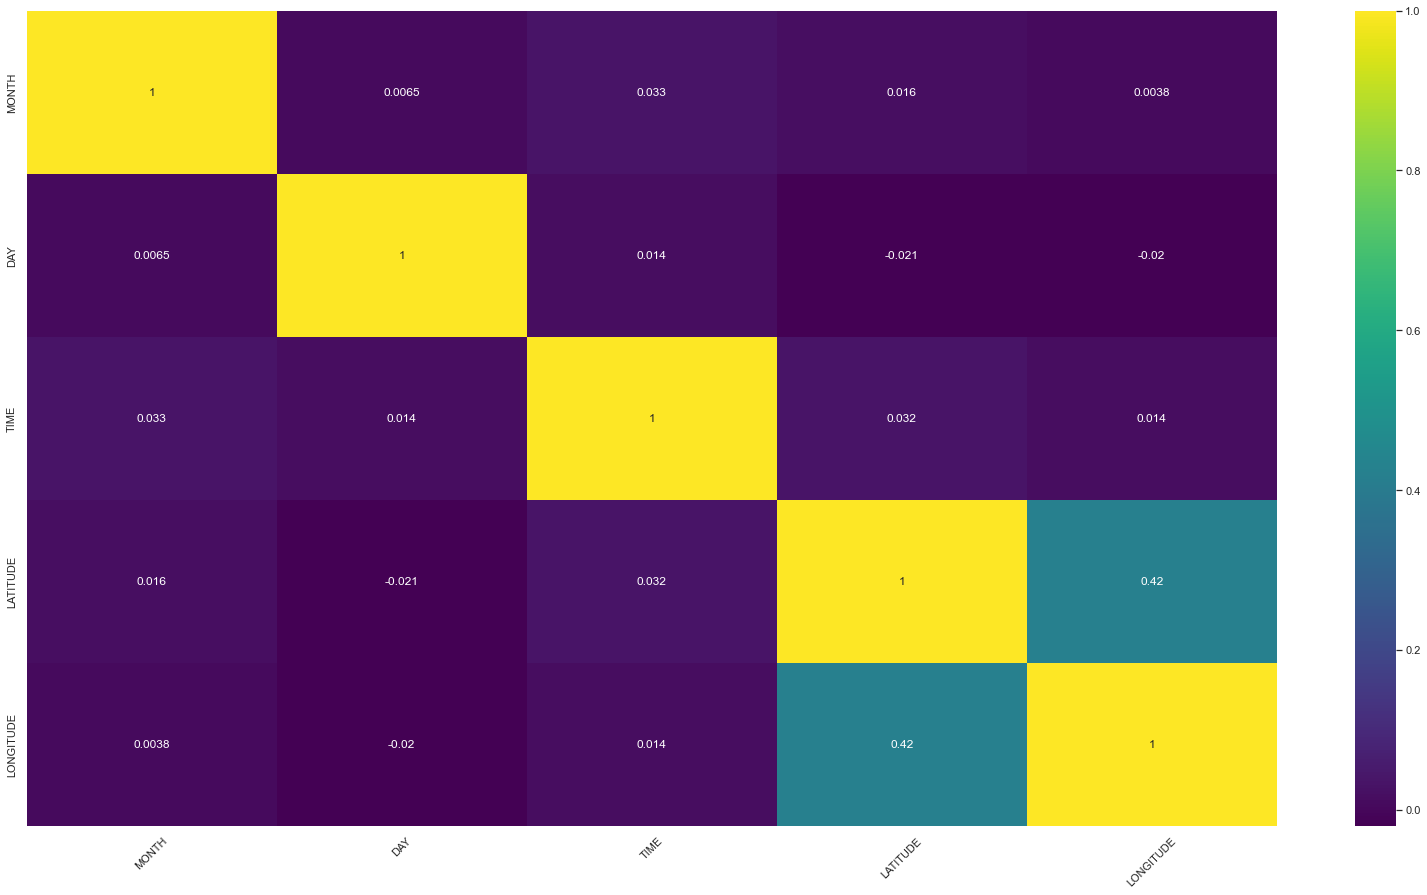

In [366]:
sns.heatmap(df_ksi.corr(method = 'pearson'), annot = True, cmap = 'viridis')
plt.xticks(rotation = 45)
plt.show()

In [367]:
# Instantiate the encoder
encoder = OneHotEncoder(drop = 'first', handle_unknown='ignore')

In [368]:
# ColumnTransformer
num_attributes = df_numeric.columns
cat_attributes = df_categorical.columns
transformer = ColumnTransformer([
    ('encoder', OneHotEncoder(drop = 'first', handle_unknown='ignore'), cat_attributes),
    ('standardizer', StandardScaler(), num_attributes)],
    remainder='passthrough',
    verbose_feature_names_out=False)

In [369]:
transformer.transformers

[('encoder',
  OneHotEncoder(drop='first', handle_unknown='ignore'),
  Index(['STREET1', 'STREET2', 'ROAD_CLASS', 'DISTRICT', 'LOCCOORD', 'TRAFFCTL',
         'VISIBILITY', 'LIGHT', 'RDSFCOND', 'IMPACTYPE', 'INVAGE', 'INJURY',
         'DRIVACT', 'DRIVCOND', 'PEDESTRIAN', 'CYCLIST', 'AUTOMOBILE',
         'MOTORCYCLE', 'TRUCK', 'TRSN_CITY_VEH', 'EMERG_VEH', 'PASSENGER',
         'SPEEDING', 'AG_DRIV', 'REDLIGHT', 'ALCOHOL', 'DISABILITY'],
        dtype='object')),
 ('standardizer',
  StandardScaler(),
  Index(['MONTH', 'DAY', 'TIME', 'LATITUDE', 'LONGITUDE'], dtype='object'))]

In [370]:
# Features and Target
features = df_pipeline.drop('Fatal', axis = 1)
target = df_pipeline.Fatal

In [371]:
# Split into Training and Test
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state = 98)

In [372]:
# Instantiate a default Support Vector Classifier
svc = SVC()

In [373]:
# Pipeline Object to streamline the process
pipeline_svc = Pipeline([
    ('col_transformer', transformer),
    ('svc', svc)
    ])

In [374]:
pipeline_svc.fit(X_train, y_train)

Pipeline(steps=[('col_transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  Index(['STREET1', 'STREET2', 'ROAD_CLASS', 'DISTRICT', 'LOCCOORD', 'TRAFFCTL',
       'VISIBILITY', 'LIGHT', 'RDSFCOND', 'IMPACTYPE', 'INVAGE', 'INJURY',
       'DRIVACT', 'DRIVCOND', 'PEDESTRIAN', 'CYCLIST', 'AUTOMOBILE',
       'MOTORCYCLE', 'TRUCK', 'TRSN_CITY_VEH', 'EMERG_VEH', 'PASSENGER',
       'SPEEDING', 'AG_DRIV', 'REDLIGHT', 'ALCOHOL', 'DISABILITY'],
      dtype='object')),
                                                 ('standardizer',
                                                  StandardScaler(),
                                                  Index(['MONTH', 'DAY', 'TIME', 'LATITUDE', 'LONGITUDE

In [375]:
scores = cross_val_score(pipeline_svc,
                        X_train,
                        y_train,
                        cv=10,
                        n_jobs=-1,
                        verbose=1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
/Users/brunomorgado/Dropbox/Bruno_Morgado/Education/Mac_Education/Centennial_College/Fourth_Semester/Supervised_learning/Team_Project/Traffic_collision_Group_2_Section_1_COMP247Project/conda-env/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0, 1, 8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/brunomorgado/Dropbox/Bruno_Morgado/Education/Mac_Education/Centennial_College/Fourth_Semester/Supervised_learning/Team_Project/Traffic_collision_Group_2_Section_1_COMP247Project/conda-env/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0, 1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/brunomorgado/Dropbox/Bruno_Morgado/Education/Mac_Education/Centennial_College/Fourth_Semester/Sup

In [376]:
print(scores)

[0.91549296 0.91030393 0.91401038 0.91178651 0.91104522 0.92587102
 0.9199407  0.91697554 0.91617211 0.91543027]


In [377]:
print(scores.mean())

0.9157028615547729


In [378]:
# Predictions
y_pred_svc = pipeline_svc.predict(X_test)

/Users/brunomorgado/Dropbox/Bruno_Morgado/Education/Mac_Education/Centennial_College/Fourth_Semester/Supervised_learning/Team_Project/Traffic_collision_Group_2_Section_1_COMP247Project/conda-env/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0, 1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [379]:
cm = confusion_matrix(y_test, y_pred_svc)

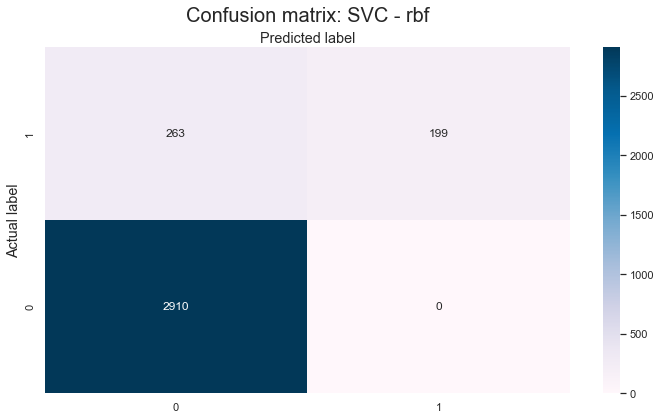

In [380]:
plot_confusion_matrix(cm, [0,2], 'SVC - rbf', 'PuBu')

In [381]:
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      2910
           1       1.00      0.43      0.60       462

    accuracy                           0.92      3372
   macro avg       0.96      0.72      0.78      3372
weighted avg       0.93      0.92      0.91      3372



precision means what percentage of the positive predictions made were actually correct.

`TP/(TP+FP)`

Recall in simple terms means, what percentage of actual positive predictions were correctly classified by the classifier.

`TP/(TP+FN)`

F1 score can also be described as the harmonic mean or weighted average of precision and recall.

`2x((precision x recall) / (precision + recall))`

In [382]:
# Dictionary with parameters names (str) as keys and lists of parameter settings to try as values.
param_grid = {'svc__kernel': ['linear', 'rbf', 'poly'],
              'svc__C': [0.01, 0.1, 1, 10, 100],
              'svc__gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0],
              'svc__degree': [2, 3]}

In [383]:
# Create a GridSearchCV object
grid_search_svc = GridSearchCV(estimator = pipeline_svc,
                                 param_grid = param_grid,
                                 scoring = 'accuracy',
                                 refit = True,
                                 n_jobs = -1,
                                 verbose = 3)

In [384]:
# Get the start time
start = time.perf_counter()

In [ ]:
grid_search_svc.fit(X_train, y_train)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


/Users/brunomorgado/Dropbox/Bruno_Morgado/Education/Mac_Education/Centennial_College/Fourth_Semester/Supervised_learning/Team_Project/Traffic_collision_Group_2_Section_1_COMP247Project/conda-env/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0, 1, 8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/brunomorgado/Dropbox/Bruno_Morgado/Education/Mac_Education/Centennial_College/Fourth_Semester/Supervised_learning/Team_Project/Traffic_collision_Group_2_Section_1_COMP247Project/conda-env/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0, 1, 5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/brunomorgado/Dropbox/Bruno_Morgado/Education/Mac_Education/Centennial_College/Fourth_Semester/Supervised_learning/Team_Project/Traffic_collision_Group_2_Section_1_COMP247P

/Users/brunomorgado/Dropbox/Bruno_Morgado/Education/Mac_Education/Centennial_College/Fourth_Semester/Supervised_learning/Team_Project/Traffic_collision_Group_2_Section_1_COMP247Project/conda-env/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0, 1, 5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/brunomorgado/Dropbox/Bruno_Morgado/Education/Mac_Education/Centennial_College/Fourth_Semester/Supervised_learning/Team_Project/Traffic_collision_Group_2_Section_1_COMP247Project/conda-env/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0, 1, 2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/brunomorgado/Dropbox/Bruno_Morgado/Education/Mac_Education/Centennial_College/Fourth_Semester/Supervised_learning/Team_Project/Traffic_collision_Group_2_Section_1_COMP247P

/Users/brunomorgado/Dropbox/Bruno_Morgado/Education/Mac_Education/Centennial_College/Fourth_Semester/Supervised_learning/Team_Project/Traffic_collision_Group_2_Section_1_COMP247Project/conda-env/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0, 1, 5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/brunomorgado/Dropbox/Bruno_Morgado/Education/Mac_Education/Centennial_College/Fourth_Semester/Supervised_learning/Team_Project/Traffic_collision_Group_2_Section_1_COMP247Project/conda-env/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0, 1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/brunomorgado/Dropbox/Bruno_Morgado/Education/Mac_Education/Centennial_College/Fourth_Semester/Supervised_learning/Team_Project/Traffic_collision_Group_2_Section_1_COMP247Proj

/Users/brunomorgado/Dropbox/Bruno_Morgado/Education/Mac_Education/Centennial_College/Fourth_Semester/Supervised_learning/Team_Project/Traffic_collision_Group_2_Section_1_COMP247Project/conda-env/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0, 1, 8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/brunomorgado/Dropbox/Bruno_Morgado/Education/Mac_Education/Centennial_College/Fourth_Semester/Supervised_learning/Team_Project/Traffic_collision_Group_2_Section_1_COMP247Project/conda-env/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0, 1, 5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/brunomorgado/Dropbox/Bruno_Morgado/Education/Mac_Education/Centennial_College/Fourth_Semester/Supervised_learning/Team_Project/Traffic_collision_Group_2_Section_1_COMP247P

/Users/brunomorgado/Dropbox/Bruno_Morgado/Education/Mac_Education/Centennial_College/Fourth_Semester/Supervised_learning/Team_Project/Traffic_collision_Group_2_Section_1_COMP247Project/conda-env/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0, 1, 8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/brunomorgado/Dropbox/Bruno_Morgado/Education/Mac_Education/Centennial_College/Fourth_Semester/Supervised_learning/Team_Project/Traffic_collision_Group_2_Section_1_COMP247Project/conda-env/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0, 1, 5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/brunomorgado/Dropbox/Bruno_Morgado/Education/Mac_Education/Centennial_College/Fourth_Semester/Supervised_learning/Team_Project/Traffic_collision_Group_2_Section_1_COMP247P

/Users/brunomorgado/Dropbox/Bruno_Morgado/Education/Mac_Education/Centennial_College/Fourth_Semester/Supervised_learning/Team_Project/Traffic_collision_Group_2_Section_1_COMP247Project/conda-env/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0, 1, 8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/brunomorgado/Dropbox/Bruno_Morgado/Education/Mac_Education/Centennial_College/Fourth_Semester/Supervised_learning/Team_Project/Traffic_collision_Group_2_Section_1_COMP247Project/conda-env/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0, 1, 5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/brunomorgado/Dropbox/Bruno_Morgado/Education/Mac_Education/Centennial_College/Fourth_Semester/Supervised_learning/Team_Project/Traffic_collision_Group_2_Section_1_COMP247P

/Users/brunomorgado/Dropbox/Bruno_Morgado/Education/Mac_Education/Centennial_College/Fourth_Semester/Supervised_learning/Team_Project/Traffic_collision_Group_2_Section_1_COMP247Project/conda-env/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0, 1, 8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/brunomorgado/Dropbox/Bruno_Morgado/Education/Mac_Education/Centennial_College/Fourth_Semester/Supervised_learning/Team_Project/Traffic_collision_Group_2_Section_1_COMP247Project/conda-env/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0, 1, 5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/brunomorgado/Dropbox/Bruno_Morgado/Education/Mac_Education/Centennial_College/Fourth_Semester/Supervised_learning/Team_Project/Traffic_collision_Group_2_Section_1_COMP247P

/Users/brunomorgado/Dropbox/Bruno_Morgado/Education/Mac_Education/Centennial_College/Fourth_Semester/Supervised_learning/Team_Project/Traffic_collision_Group_2_Section_1_COMP247Project/conda-env/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0, 1, 8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/brunomorgado/Dropbox/Bruno_Morgado/Education/Mac_Education/Centennial_College/Fourth_Semester/Supervised_learning/Team_Project/Traffic_collision_Group_2_Section_1_COMP247Project/conda-env/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0, 1, 5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/brunomorgado/Dropbox/Bruno_Morgado/Education/Mac_Education/Centennial_College/Fourth_Semester/Supervised_learning/Team_Project/Traffic_collision_Group_2_Section_1_COMP247P

/Users/brunomorgado/Dropbox/Bruno_Morgado/Education/Mac_Education/Centennial_College/Fourth_Semester/Supervised_learning/Team_Project/Traffic_collision_Group_2_Section_1_COMP247Project/conda-env/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0, 1, 5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/brunomorgado/Dropbox/Bruno_Morgado/Education/Mac_Education/Centennial_College/Fourth_Semester/Supervised_learning/Team_Project/Traffic_collision_Group_2_Section_1_COMP247Project/conda-env/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0, 1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/brunomorgado/Dropbox/Bruno_Morgado/Education/Mac_Education/Centennial_College/Fourth_Semester/Supervised_learning/Team_Project/Traffic_collision_Group_2_Section_1_COMP247Proj

/Users/brunomorgado/Dropbox/Bruno_Morgado/Education/Mac_Education/Centennial_College/Fourth_Semester/Supervised_learning/Team_Project/Traffic_collision_Group_2_Section_1_COMP247Project/conda-env/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0, 1, 2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/brunomorgado/Dropbox/Bruno_Morgado/Education/Mac_Education/Centennial_College/Fourth_Semester/Supervised_learning/Team_Project/Traffic_collision_Group_2_Section_1_COMP247Project/conda-env/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0, 1, 5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/brunomorgado/Dropbox/Bruno_Morgado/Education/Mac_Education/Centennial_College/Fourth_Semester/Supervised_learning/Team_Project/Traffic_collision_Group_2_Section_1_COMP247P

/Users/brunomorgado/Dropbox/Bruno_Morgado/Education/Mac_Education/Centennial_College/Fourth_Semester/Supervised_learning/Team_Project/Traffic_collision_Group_2_Section_1_COMP247Project/conda-env/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0, 1, 8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/brunomorgado/Dropbox/Bruno_Morgado/Education/Mac_Education/Centennial_College/Fourth_Semester/Supervised_learning/Team_Project/Traffic_collision_Group_2_Section_1_COMP247Project/conda-env/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0, 1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/brunomorgado/Dropbox/Bruno_Morgado/Education/Mac_Education/Centennial_College/Fourth_Semester/Supervised_learning/Team_Project/Traffic_collision_Group_2_Section_1_COMP247Proj

/Users/brunomorgado/Dropbox/Bruno_Morgado/Education/Mac_Education/Centennial_College/Fourth_Semester/Supervised_learning/Team_Project/Traffic_collision_Group_2_Section_1_COMP247Project/conda-env/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0, 1, 8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/brunomorgado/Dropbox/Bruno_Morgado/Education/Mac_Education/Centennial_College/Fourth_Semester/Supervised_learning/Team_Project/Traffic_collision_Group_2_Section_1_COMP247Project/conda-env/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0, 1, 5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/brunomorgado/Dropbox/Bruno_Morgado/Education/Mac_Education/Centennial_College/Fourth_Semester/Supervised_learning/Team_Project/Traffic_collision_Group_2_Section_1_COMP247P

/Users/brunomorgado/Dropbox/Bruno_Morgado/Education/Mac_Education/Centennial_College/Fourth_Semester/Supervised_learning/Team_Project/Traffic_collision_Group_2_Section_1_COMP247Project/conda-env/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0, 1, 2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/brunomorgado/Dropbox/Bruno_Morgado/Education/Mac_Education/Centennial_College/Fourth_Semester/Supervised_learning/Team_Project/Traffic_collision_Group_2_Section_1_COMP247Project/conda-env/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0, 1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/brunomorgado/Dropbox/Bruno_Morgado/Education/Mac_Education/Centennial_College/Fourth_Semester/Supervised_learning/Team_Project/Traffic_collision_Group_2_Section_1_COMP247Proj

/Users/brunomorgado/Dropbox/Bruno_Morgado/Education/Mac_Education/Centennial_College/Fourth_Semester/Supervised_learning/Team_Project/Traffic_collision_Group_2_Section_1_COMP247Project/conda-env/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0, 1, 5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/brunomorgado/Dropbox/Bruno_Morgado/Education/Mac_Education/Centennial_College/Fourth_Semester/Supervised_learning/Team_Project/Traffic_collision_Group_2_Section_1_COMP247Project/conda-env/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0, 1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/brunomorgado/Dropbox/Bruno_Morgado/Education/Mac_Education/Centennial_College/Fourth_Semester/Supervised_learning/Team_Project/Traffic_collision_Group_2_Section_1_COMP247Proj

/Users/brunomorgado/Dropbox/Bruno_Morgado/Education/Mac_Education/Centennial_College/Fourth_Semester/Supervised_learning/Team_Project/Traffic_collision_Group_2_Section_1_COMP247Project/conda-env/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0, 1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/brunomorgado/Dropbox/Bruno_Morgado/Education/Mac_Education/Centennial_College/Fourth_Semester/Supervised_learning/Team_Project/Traffic_collision_Group_2_Section_1_COMP247Project/conda-env/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0, 1, 5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/brunomorgado/Dropbox/Bruno_Morgado/Education/Mac_Education/Centennial_College/Fourth_Semester/Supervised_learning/Team_Project/Traffic_collision_Group_2_Section_1_COMP247Proj

/Users/brunomorgado/Dropbox/Bruno_Morgado/Education/Mac_Education/Centennial_College/Fourth_Semester/Supervised_learning/Team_Project/Traffic_collision_Group_2_Section_1_COMP247Project/conda-env/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0, 1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/brunomorgado/Dropbox/Bruno_Morgado/Education/Mac_Education/Centennial_College/Fourth_Semester/Supervised_learning/Team_Project/Traffic_collision_Group_2_Section_1_COMP247Project/conda-env/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0, 1, 5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/brunomorgado/Dropbox/Bruno_Morgado/Education/Mac_Education/Centennial_College/Fourth_Semester/Supervised_learning/Team_Project/Traffic_collision_Group_2_Section_1_COMP247Proj

/Users/brunomorgado/Dropbox/Bruno_Morgado/Education/Mac_Education/Centennial_College/Fourth_Semester/Supervised_learning/Team_Project/Traffic_collision_Group_2_Section_1_COMP247Project/conda-env/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0, 1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/brunomorgado/Dropbox/Bruno_Morgado/Education/Mac_Education/Centennial_College/Fourth_Semester/Supervised_learning/Team_Project/Traffic_collision_Group_2_Section_1_COMP247Project/conda-env/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0, 1, 5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/brunomorgado/Dropbox/Bruno_Morgado/Education/Mac_Education/Centennial_College/Fourth_Semester/Supervised_learning/Team_Project/Traffic_collision_Group_2_Section_1_COMP247Proj

/Users/brunomorgado/Dropbox/Bruno_Morgado/Education/Mac_Education/Centennial_College/Fourth_Semester/Supervised_learning/Team_Project/Traffic_collision_Group_2_Section_1_COMP247Project/conda-env/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0, 1, 5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/brunomorgado/Dropbox/Bruno_Morgado/Education/Mac_Education/Centennial_College/Fourth_Semester/Supervised_learning/Team_Project/Traffic_collision_Group_2_Section_1_COMP247Project/conda-env/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0, 1, 2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/brunomorgado/Dropbox/Bruno_Morgado/Education/Mac_Education/Centennial_College/Fourth_Semester/Supervised_learning/Team_Project/Traffic_collision_Group_2_Section_1_COMP247P

/Users/brunomorgado/Dropbox/Bruno_Morgado/Education/Mac_Education/Centennial_College/Fourth_Semester/Supervised_learning/Team_Project/Traffic_collision_Group_2_Section_1_COMP247Project/conda-env/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0, 1, 8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/brunomorgado/Dropbox/Bruno_Morgado/Education/Mac_Education/Centennial_College/Fourth_Semester/Supervised_learning/Team_Project/Traffic_collision_Group_2_Section_1_COMP247Project/conda-env/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0, 1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/brunomorgado/Dropbox/Bruno_Morgado/Education/Mac_Education/Centennial_College/Fourth_Semester/Supervised_learning/Team_Project/Traffic_collision_Group_2_Section_1_COMP247Proj

/Users/brunomorgado/Dropbox/Bruno_Morgado/Education/Mac_Education/Centennial_College/Fourth_Semester/Supervised_learning/Team_Project/Traffic_collision_Group_2_Section_1_COMP247Project/conda-env/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0, 1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/brunomorgado/Dropbox/Bruno_Morgado/Education/Mac_Education/Centennial_College/Fourth_Semester/Supervised_learning/Team_Project/Traffic_collision_Group_2_Section_1_COMP247Project/conda-env/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0, 1, 2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/brunomorgado/Dropbox/Bruno_Morgado/Education/Mac_Education/Centennial_College/Fourth_Semester/Supervised_learning/Team_Project/Traffic_collision_Group_2_Section_1_COMP247Proj

/Users/brunomorgado/Dropbox/Bruno_Morgado/Education/Mac_Education/Centennial_College/Fourth_Semester/Supervised_learning/Team_Project/Traffic_collision_Group_2_Section_1_COMP247Project/conda-env/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0, 1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/brunomorgado/Dropbox/Bruno_Morgado/Education/Mac_Education/Centennial_College/Fourth_Semester/Supervised_learning/Team_Project/Traffic_collision_Group_2_Section_1_COMP247Project/conda-env/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0, 1, 5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/brunomorgado/Dropbox/Bruno_Morgado/Education/Mac_Education/Centennial_College/Fourth_Semester/Supervised_learning/Team_Project/Traffic_collision_Group_2_Section_1_COMP247Proj

/Users/brunomorgado/Dropbox/Bruno_Morgado/Education/Mac_Education/Centennial_College/Fourth_Semester/Supervised_learning/Team_Project/Traffic_collision_Group_2_Section_1_COMP247Project/conda-env/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0, 1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/brunomorgado/Dropbox/Bruno_Morgado/Education/Mac_Education/Centennial_College/Fourth_Semester/Supervised_learning/Team_Project/Traffic_collision_Group_2_Section_1_COMP247Project/conda-env/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0, 1, 5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/brunomorgado/Dropbox/Bruno_Morgado/Education/Mac_Education/Centennial_College/Fourth_Semester/Supervised_learning/Team_Project/Traffic_collision_Group_2_Section_1_COMP247Proj

/Users/brunomorgado/Dropbox/Bruno_Morgado/Education/Mac_Education/Centennial_College/Fourth_Semester/Supervised_learning/Team_Project/Traffic_collision_Group_2_Section_1_COMP247Project/conda-env/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0, 1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/brunomorgado/Dropbox/Bruno_Morgado/Education/Mac_Education/Centennial_College/Fourth_Semester/Supervised_learning/Team_Project/Traffic_collision_Group_2_Section_1_COMP247Project/conda-env/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0, 1, 5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/brunomorgado/Dropbox/Bruno_Morgado/Education/Mac_Education/Centennial_College/Fourth_Semester/Supervised_learning/Team_Project/Traffic_collision_Group_2_Section_1_COMP247Proj

/Users/brunomorgado/Dropbox/Bruno_Morgado/Education/Mac_Education/Centennial_College/Fourth_Semester/Supervised_learning/Team_Project/Traffic_collision_Group_2_Section_1_COMP247Project/conda-env/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0, 1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/brunomorgado/Dropbox/Bruno_Morgado/Education/Mac_Education/Centennial_College/Fourth_Semester/Supervised_learning/Team_Project/Traffic_collision_Group_2_Section_1_COMP247Project/conda-env/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0, 1, 5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/brunomorgado/Dropbox/Bruno_Morgado/Education/Mac_Education/Centennial_College/Fourth_Semester/Supervised_learning/Team_Project/Traffic_collision_Group_2_Section_1_COMP247Proj

/Users/brunomorgado/Dropbox/Bruno_Morgado/Education/Mac_Education/Centennial_College/Fourth_Semester/Supervised_learning/Team_Project/Traffic_collision_Group_2_Section_1_COMP247Project/conda-env/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0, 1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/brunomorgado/Dropbox/Bruno_Morgado/Education/Mac_Education/Centennial_College/Fourth_Semester/Supervised_learning/Team_Project/Traffic_collision_Group_2_Section_1_COMP247Project/conda-env/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0, 1, 5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/brunomorgado/Dropbox/Bruno_Morgado/Education/Mac_Education/Centennial_College/Fourth_Semester/Supervised_learning/Team_Project/Traffic_collision_Group_2_Section_1_COMP247Proj

/Users/brunomorgado/Dropbox/Bruno_Morgado/Education/Mac_Education/Centennial_College/Fourth_Semester/Supervised_learning/Team_Project/Traffic_collision_Group_2_Section_1_COMP247Project/conda-env/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0, 1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/brunomorgado/Dropbox/Bruno_Morgado/Education/Mac_Education/Centennial_College/Fourth_Semester/Supervised_learning/Team_Project/Traffic_collision_Group_2_Section_1_COMP247Project/conda-env/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0, 1, 8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/brunomorgado/Dropbox/Bruno_Morgado/Education/Mac_Education/Centennial_College/Fourth_Semester/Supervised_learning/Team_Project/Traffic_collision_Group_2_Section_1_COMP247Proj

/Users/brunomorgado/Dropbox/Bruno_Morgado/Education/Mac_Education/Centennial_College/Fourth_Semester/Supervised_learning/Team_Project/Traffic_collision_Group_2_Section_1_COMP247Project/conda-env/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0, 1, 5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/brunomorgado/Dropbox/Bruno_Morgado/Education/Mac_Education/Centennial_College/Fourth_Semester/Supervised_learning/Team_Project/Traffic_collision_Group_2_Section_1_COMP247Project/conda-env/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0, 1, 8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/brunomorgado/Dropbox/Bruno_Morgado/Education/Mac_Education/Centennial_College/Fourth_Semester/Supervised_learning/Team_Project/Traffic_collision_Group_2_Section_1_COMP247P

/Users/brunomorgado/Dropbox/Bruno_Morgado/Education/Mac_Education/Centennial_College/Fourth_Semester/Supervised_learning/Team_Project/Traffic_collision_Group_2_Section_1_COMP247Project/conda-env/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0, 1, 2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/brunomorgado/Dropbox/Bruno_Morgado/Education/Mac_Education/Centennial_College/Fourth_Semester/Supervised_learning/Team_Project/Traffic_collision_Group_2_Section_1_COMP247Project/conda-env/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0, 1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/brunomorgado/Dropbox/Bruno_Morgado/Education/Mac_Education/Centennial_College/Fourth_Semester/Supervised_learning/Team_Project/Traffic_collision_Group_2_Section_1_COMP247Proj

/Users/brunomorgado/Dropbox/Bruno_Morgado/Education/Mac_Education/Centennial_College/Fourth_Semester/Supervised_learning/Team_Project/Traffic_collision_Group_2_Section_1_COMP247Project/conda-env/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0, 1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/brunomorgado/Dropbox/Bruno_Morgado/Education/Mac_Education/Centennial_College/Fourth_Semester/Supervised_learning/Team_Project/Traffic_collision_Group_2_Section_1_COMP247Project/conda-env/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0, 1, 5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/brunomorgado/Dropbox/Bruno_Morgado/Education/Mac_Education/Centennial_College/Fourth_Semester/Supervised_learning/Team_Project/Traffic_collision_Group_2_Section_1_COMP247Proj

/Users/brunomorgado/Dropbox/Bruno_Morgado/Education/Mac_Education/Centennial_College/Fourth_Semester/Supervised_learning/Team_Project/Traffic_collision_Group_2_Section_1_COMP247Project/conda-env/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0, 1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/brunomorgado/Dropbox/Bruno_Morgado/Education/Mac_Education/Centennial_College/Fourth_Semester/Supervised_learning/Team_Project/Traffic_collision_Group_2_Section_1_COMP247Project/conda-env/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0, 1, 5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/brunomorgado/Dropbox/Bruno_Morgado/Education/Mac_Education/Centennial_College/Fourth_Semester/Supervised_learning/Team_Project/Traffic_collision_Group_2_Section_1_COMP247Proj

/Users/brunomorgado/Dropbox/Bruno_Morgado/Education/Mac_Education/Centennial_College/Fourth_Semester/Supervised_learning/Team_Project/Traffic_collision_Group_2_Section_1_COMP247Project/conda-env/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0, 1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/brunomorgado/Dropbox/Bruno_Morgado/Education/Mac_Education/Centennial_College/Fourth_Semester/Supervised_learning/Team_Project/Traffic_collision_Group_2_Section_1_COMP247Project/conda-env/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0, 1, 5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/brunomorgado/Dropbox/Bruno_Morgado/Education/Mac_Education/Centennial_College/Fourth_Semester/Supervised_learning/Team_Project/Traffic_collision_Group_2_Section_1_COMP247Proj

/Users/brunomorgado/Dropbox/Bruno_Morgado/Education/Mac_Education/Centennial_College/Fourth_Semester/Supervised_learning/Team_Project/Traffic_collision_Group_2_Section_1_COMP247Project/conda-env/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0, 1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/brunomorgado/Dropbox/Bruno_Morgado/Education/Mac_Education/Centennial_College/Fourth_Semester/Supervised_learning/Team_Project/Traffic_collision_Group_2_Section_1_COMP247Project/conda-env/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0, 1, 5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/brunomorgado/Dropbox/Bruno_Morgado/Education/Mac_Education/Centennial_College/Fourth_Semester/Supervised_learning/Team_Project/Traffic_collision_Group_2_Section_1_COMP247Proj

/Users/brunomorgado/Dropbox/Bruno_Morgado/Education/Mac_Education/Centennial_College/Fourth_Semester/Supervised_learning/Team_Project/Traffic_collision_Group_2_Section_1_COMP247Project/conda-env/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0, 1, 5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/brunomorgado/Dropbox/Bruno_Morgado/Education/Mac_Education/Centennial_College/Fourth_Semester/Supervised_learning/Team_Project/Traffic_collision_Group_2_Section_1_COMP247Project/conda-env/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0, 1, 2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/brunomorgado/Dropbox/Bruno_Morgado/Education/Mac_Education/Centennial_College/Fourth_Semester/Supervised_learning/Team_Project/Traffic_collision_Group_2_Section_1_COMP247P

/Users/brunomorgado/Dropbox/Bruno_Morgado/Education/Mac_Education/Centennial_College/Fourth_Semester/Supervised_learning/Team_Project/Traffic_collision_Group_2_Section_1_COMP247Project/conda-env/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0, 1, 5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/brunomorgado/Dropbox/Bruno_Morgado/Education/Mac_Education/Centennial_College/Fourth_Semester/Supervised_learning/Team_Project/Traffic_collision_Group_2_Section_1_COMP247Project/conda-env/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0, 1, 2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/brunomorgado/Dropbox/Bruno_Morgado/Education/Mac_Education/Centennial_College/Fourth_Semester/Supervised_learning/Team_Project/Traffic_collision_Group_2_Section_1_COMP247P

/Users/brunomorgado/Dropbox/Bruno_Morgado/Education/Mac_Education/Centennial_College/Fourth_Semester/Supervised_learning/Team_Project/Traffic_collision_Group_2_Section_1_COMP247Project/conda-env/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0, 1, 5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/brunomorgado/Dropbox/Bruno_Morgado/Education/Mac_Education/Centennial_College/Fourth_Semester/Supervised_learning/Team_Project/Traffic_collision_Group_2_Section_1_COMP247Project/conda-env/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0, 1, 8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/brunomorgado/Dropbox/Bruno_Morgado/Education/Mac_Education/Centennial_College/Fourth_Semester/Supervised_learning/Team_Project/Traffic_collision_Group_2_Section_1_COMP247P

/Users/brunomorgado/Dropbox/Bruno_Morgado/Education/Mac_Education/Centennial_College/Fourth_Semester/Supervised_learning/Team_Project/Traffic_collision_Group_2_Section_1_COMP247Project/conda-env/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0, 1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/brunomorgado/Dropbox/Bruno_Morgado/Education/Mac_Education/Centennial_College/Fourth_Semester/Supervised_learning/Team_Project/Traffic_collision_Group_2_Section_1_COMP247Project/conda-env/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0, 1, 5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/brunomorgado/Dropbox/Bruno_Morgado/Education/Mac_Education/Centennial_College/Fourth_Semester/Supervised_learning/Team_Project/Traffic_collision_Group_2_Section_1_COMP247Proj

/Users/brunomorgado/Dropbox/Bruno_Morgado/Education/Mac_Education/Centennial_College/Fourth_Semester/Supervised_learning/Team_Project/Traffic_collision_Group_2_Section_1_COMP247Project/conda-env/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0, 1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/brunomorgado/Dropbox/Bruno_Morgado/Education/Mac_Education/Centennial_College/Fourth_Semester/Supervised_learning/Team_Project/Traffic_collision_Group_2_Section_1_COMP247Project/conda-env/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0, 1, 8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/brunomorgado/Dropbox/Bruno_Morgado/Education/Mac_Education/Centennial_College/Fourth_Semester/Supervised_learning/Team_Project/Traffic_collision_Group_2_Section_1_COMP247Proj

/Users/brunomorgado/Dropbox/Bruno_Morgado/Education/Mac_Education/Centennial_College/Fourth_Semester/Supervised_learning/Team_Project/Traffic_collision_Group_2_Section_1_COMP247Project/conda-env/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0, 1, 5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/brunomorgado/Dropbox/Bruno_Morgado/Education/Mac_Education/Centennial_College/Fourth_Semester/Supervised_learning/Team_Project/Traffic_collision_Group_2_Section_1_COMP247Project/conda-env/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0, 1, 8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/brunomorgado/Dropbox/Bruno_Morgado/Education/Mac_Education/Centennial_College/Fourth_Semester/Supervised_learning/Team_Project/Traffic_collision_Group_2_Section_1_COMP247P

In [ ]:
# The the final time of processing
end = time.perf_counter()

In [ ]:
# Best hyperparameters
print("tuned hpyerparameters :(best parameters) ", grid_search_svc.best_params_)
print("Best Estimator :", grid_search_svc.best_estimator_)

In [ ]:
# Store the best model into a variable
best_model_svc = grid_search_svc.best_estimator_

In [ ]:
# Make predictions with the best SVC model
pred_svc = best_model_svc.predict(X_test)

In [ ]:
# Get the Score
best_model_svc.score(X_test, y_test)

In [ ]:
# Import joblib to save the model
import joblib

In [ ]:
joblib.dump(best_model_svc, "SVC_model.pkl")

In [ ]:
joblib.dump(pipeline_svc, "pipeline_svc.pkl")

In [ ]:
import dill

In [ ]:
dill.dump_session('notebook_env_SVC.db')

In [ ]:
# Print the classification Report
print('\t\tClassification Report\n\n',classification_report(y_test, pred_svc))

In [ ]:
# Total time to run GridSearchCV
print(f'GridSearchCV processing time: {round((end-start), 2)} s')

## Logistic Regression Model

In [ ]:
logmodel = LogisticRegression(max_iter=1000)
pipeline_log = Pipeline([
    ('col_transformer', transformer),
    ('log', logmodel)
    ])

In [ ]:
pipeline_log.fit(X_train, y_train)

In [ ]:
scores_log = cross_val_score(pipeline_log,
                        X_train,
                        y_train,
                        cv=10,
                        n_jobs=-1,
                        verbose=1)

In [ ]:
# Logistic Regression Scores
print(scores_log)

In [ ]:
# Average Scores
print(scores_log.mean())

In [ ]:
# Dictionary with parameters names (str) as keys and lists of parameter settings to try as values.
param_grid_log = {'log__penalty': ['l1', 'l2', 'elasticnet'],
              'log__C': [0.01, 0.1, 1, 10, 100],
              'log__solver': ['newton-cg', 'lbfgs', 'liblinear', 'saga']}

In [ ]:
# Create a GridSearchCV object
grid_search_logistic = GridSearchCV(estimator = pipeline_log,
                                 param_grid = param_grid_log,
                                 scoring = 'accuracy',
                                 refit = True,
                                 n_jobs = -1,
                                 verbose = 3)

In [ ]:
# Get the start time
start = time.perf_counter()

In [ ]:
# Run fit with all sets of parameters
grid_search_logistic.fit(X_train, y_train)

In [ ]:
# The the final time of processing
end = time.perf_counter()

In [ ]:
# Total time to run GridSearchCV
print(f'GridSearchCV processing time: {round((end-start), 2)} s')

In [ ]:
# Store the best model into a variable
best_model_log = grid_search_logistic.best_estimator_

In [ ]:
joblib.dump(best_model_log, "LOGISTIC_model.pkl")

In [ ]:
joblib.dump(pipeline_log, "pipeline_logistic.pkl")

In [ ]:
dill.dump_session('notebook_env_LOGISTIC.db')

In [ ]:
best_model_log.score(X_test, y_test)

## Random Forest Classifier

In [ ]:
rf = RandomForestClassifier()
pipeline_rf = Pipeline([
    ('col_transformer', transformer),
    ('rf', rf)
    ])

In [ ]:
pipeline_rf.fit(X_train, y_train)

In [ ]:
scores_rf = cross_val_score(pipeline_rf,
                        X_train,
                        y_train,
                        cv=10,
                        n_jobs=-1,
                        verbose=1)

In [ ]:
print(scores_rf)

In [ ]:
print(scores_rf.mean())

In [ ]:
# Dictionary with parameters names (str) as keys and lists of parameter settings to try as values.
param_grid_rf = {'rf__n_estimators': [100, 150, 200],
                 'rf__criterion': ['gini', 'entropi', 'log_loss'],
                 'rf__max_features': ['auto', 'sqrt', 'log2'],
                 'rf__max_depth': [4, 5, 6, 7, 8]}

In [ ]:
# Create a GridSearchCV object
grid_search_rf = GridSearchCV(estimator = pipeline_rf,
                                 param_grid = param_grid_rf,
                                 scoring = 'accuracy',
                                 refit = True,
                                 n_jobs = -1,
                                 verbose = 3)

In [ ]:
# Get the start time
start = time.perf_counter()

In [ ]:
# Run fit with all sets of parameters
grid_search_rf.fit(X_train, y_train)

In [ ]:
# The the final time of processing
end = time.perf_counter()

In [ ]:
# Total time to run GridSearchCV
print(f'GridSearchCV processing time: {round((end-start), 2)} s')

In [ ]:
# Store the best model into a variable
best_model_rf = grid_search_logistic.best_estimator_

In [ ]:
joblib.dump(best_model_rf, "RANDOM_FOREST_model.pkl")

In [ ]:
dill.dump_session('notebook_env_RANDOM_FOREST.db')

In [ ]:
best_model_rf.score(X_test, y_test)

##### END